# No show appointments 

What factors to missing something as important as a doctor's appointment? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

This dataset contains information about appointments in brazil and is focused on whether or not patients show up for their appointment. My aim here is to explore this data and analyze the factors that contribute to patient showing up(or not showing up) for scheduled appointments.



<a id='intro'></a>
## Introduction

In [130]:
# Importing modules 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.plotting import scatter_matrix

%matplotlib inline

#### Feature description (As learnt from Kaggle)

1. PatientId - Identification of a patient 
2. AppointmentID - Identification of each appointment 
3. Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 4. ScheduledDay - The day of the actuall appointment, when they have to visit the doctor
5. AppointmentDay - The day someone called or registered the appointment, this is before appointment of course
6. Age - How old is the patient
7. Neighbourhood - Location of the hospital
8. Scholarship - 1/0 (Yes/No)
9. Hipertension(Need to replace with Hypertension) : 1/0 (Yes/No)
10. Diabetes - 1/0 (Yes/No)
11. Alcoholism - 1/0 (Yes/No) 
12. Handcap(Will change this to Handicap) - 0 for No/ 1 or more for Yes 
13. SMS_received - 1 or more messages sent to the patient
14. No-show = Yes or No (Yes for not showing up and No for showing up) 

#### Questions 

1. Are specific age groups more consistent in attending their appointments and Which age group among females has the least no_show rate?
2. Are patients who are notified via SMS less likely to miss their appointments? Is there a correlation between days_before_appointment and sms_received? And what is their correlation with no_show?
3. Are patients with same day appointments  more likely to attend it. Which age_group has the most number of same_day_appointments? Which age_group has the highest no_show rate among them? 

<a id='wrangling'></a>
## Data Wrangling


### General Properties



In [72]:
#This section is for loading and initial exploration of data 

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#Top 3 rows of the dataset 
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [73]:
#Dimension of the dataset 
df.shape

(110527, 14)

In [74]:
#Checking for null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Observations :

1. This dataset has 110527 entries(rows) and 14 features(columns) 
2. The naming convention is not consistent 
3. No null values in the dataset 
4. There are a few spelling mistakes in column names - Hipertension, Handcap 

### To keep the naming convention consistent, I am renaming the columns in this section 


In [75]:
columns_new = ['patient_id', 'appointment_id', 'gender', 'scheduled_day','appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes','alcoholism', 'handicap','sms_received','no_show']
df.columns = columns_new
#verify 

df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

### Lets check for duplicate rows

In [76]:
sum(df.duplicated())

0

#### Observation: 

No duplicate rows

In [77]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Analyzing features. This will help me understand the charateristics of each feature better 


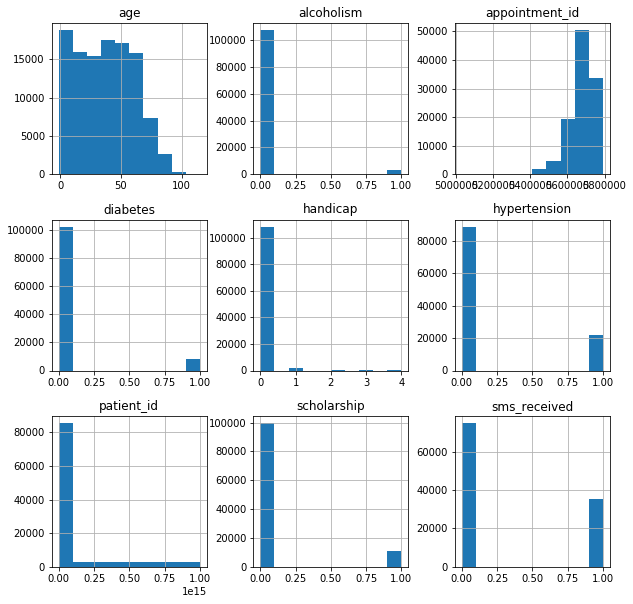

In [78]:
#Histogram of the dataset 

df.hist(figsize= (10,10));

### patient_id

A few values in the patient_id column are of float type. Since these ids are only for unique identification of patients and will not affect the analysis. I will convert them to int type. In other words, a patient showing up or not showing up might not be related to what id he was assigned. 


In [79]:
#Converting to int
df.patient_id = df.patient_id.astype(int)

print("Unique patient_ids " + str(len(df['patient_id'].unique())))

print("\n")


Unique patient_ids 62299




Observation: Looks like there are a few regular patients in this dataset  

### appointment_id 


In [80]:
print(len(df['appointment_id'].unique()))

110527


Observation: Each appointment in the dataset value is given a unique apoointment_id 

###  gender 


In [81]:
print(df.gender.value_counts())

F    71840
M    38687
Name: gender, dtype: int64


Observation: There are a lot more female patients (in this dataset )in comparison to male patients 

### scheduled_day 

In [82]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

print(df.scheduled_day.describe())

print("\n")

print("\n")
 
print("Earliest date : " + str(df.scheduled_day.min()))

print("Last date : " + str(df.scheduled_day.max()))

total_days = df.scheduled_day.max() - df.scheduled_day.min()
print("Time span over which we have scheduled_day data: " + str(total_days))

count                  110527
unique                 103549
top       2016-05-06 07:09:54
freq                       24
first     2015-11-10 07:13:56
last      2016-06-08 20:07:23
Name: scheduled_day, dtype: object




Earliest date : 2015-11-10 07:13:56
Last date : 2016-06-08 20:07:23
Time span over which we have scheduled_day data: 211 days 12:53:27


Observation: This dataset contains appointments made over the time period of 211 days 

### appointment_day

In [83]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'])


df.appointment_day.describe()
print("Earliest date in the dataset: " + str(df.appointment_day.min()))

print("Last date in the dataset: " + str(df.appointment_day.max()))

total_days = df.appointment_day.max() - df.appointment_day.min()
print("Time span over which we have appointment_day data: " + str(total_days))


Earliest date in the dataset: 2016-04-29 00:00:00
Last date in the dataset: 2016-06-08 00:00:00
Time span over which we have appointment_day data: 40 days 00:00:00


Observation: The time span of appointment day is 40 days

### age

In [84]:
print(df.age.describe())
print("\n")



count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64




In [85]:
print(df.query('age == -1')['patient_id'])


#Check if there anre any other entris corresponding to that particular patient_id 
df.query('patient_id == 465943158731293')


99832    465943158731293
Name: patient_id, dtype: int64


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Observation:  There is only one entry with age as -1. Could this be an appointment for an unborn baby? Or this might just be a typo. I checked if this particular patient has any other entry in our dataset (using df.query). Since we do not have any other information about this patient, we cannot come to any conclusion of whether it was taken for an unborn baby or not. I will leave this entry as it is, since I could not find more information about it

###  neighborhood

In [86]:
print(df.neighbourhood.describe())


count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object


Observation:   There are 81 different neighborhoods in this dataset 


### scholarship 


In [87]:
df.scholarship.value_counts()


0    99666
1    10861
Name: scholarship, dtype: int64

Observation: 10861 patients have a scholarship

### hypertension


In [88]:
df.hypertension.value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

Observation: 21801 out of 110527 patients are suffering from hypertension

### diabetes 

In [89]:
df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

Observation:  7943 out of 110527 patients suffer from diabetes 

### alcoholism 

In [90]:
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

Observation: 3360 out of 110527 patients suffer from alcoholism
### handicap

In [91]:
df.handicap.value_counts()


0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

Observation: Data entries with values 1 to 4 in the column 'handicap' can be regrouped as '1'  (Will be done in the data cleaning section) 


### sms_recieved 


In [92]:

print(df.sms_received.value_counts())

print(df.sms_received.describe())

#df.query('sms_received == 0')['patient_id]'.count()

0    75045
1    35482
Name: sms_received, dtype: int64
count    110527.000000
mean          0.321026
std           0.466873
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sms_received, dtype: float64


Observation: 

More than 50 percent of the patients did not recieve an sms notification

### Proportions of each feature 

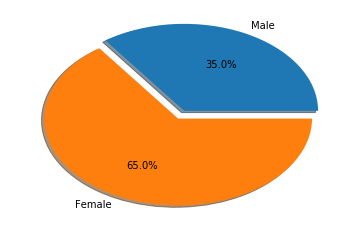

In [93]:
# Pie chart for visualizing the feature 'gender'

explode = (0.1,0) 

plt.figure(0)
male = df.query('gender == "M"')['patient_id'].count()
female = df.query('gender == "F"')['patient_id'].count()
plt.pie([male,female],explode = explode, labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True);

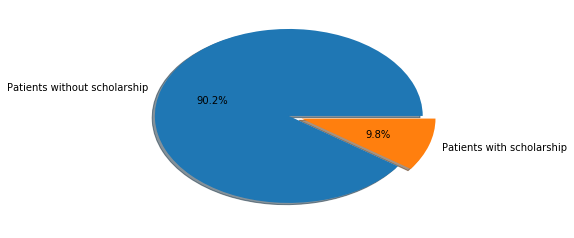

In [94]:
#Proportion distribution of the feature 'scholarship'

scholarship = df.query('scholarship == 1')['patient_id'].count()
no_scholarship = df.query('scholarship == 0')['patient_id'].count()
plt.pie([no_scholarship,scholarship],explode = explode, labels=['Patients without scholarship', 'Patients with scholarship'], autopct='%1.1f%%',
        shadow=True);


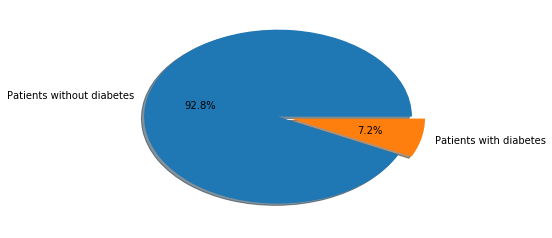

In [95]:
# Proportion distribution of the feature 'diabetes'

diabetes = df.query('diabetes == 1')['patient_id'].count()
no_diabetes = df.query('diabetes == 0')['patient_id'].count()
plt.pie([no_diabetes, diabetes],explode = explode, labels=['Patients without diabetes', 'Patients with diabetes'], autopct='%1.1f%%',
        shadow=True);

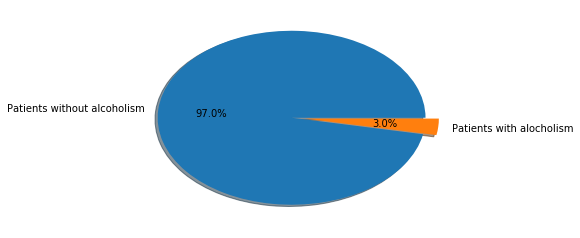

In [96]:
#Proportion distribution of the feture 'alcoholism'

alcoholism = df.query('alcoholism == 1')['patient_id'].count()
no_alcoholism = df.query('alcoholism == 0')['patient_id'].count()
plt.pie([no_alcoholism,alcoholism], explode = explode, labels = ['Patients without alcoholism', 'Patients with alocholism'], autopct='%1.1f%%' , shadow = True);


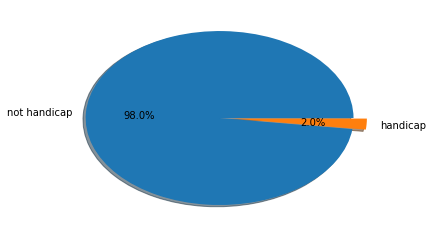

In [97]:
#Proportion distribution of the feature 'handicap'
handicap = df.query('handicap != 0')['patient_id'].count()
not_handicap = df.query('handicap == 0')['patient_id'].count()
plt.pie([not_handicap,handicap], explode = explode, labels = ['not handicap','handicap'], autopct = '%1.1f%%', shadow = True);


In [98]:
df.no_show =  df.no_show.replace({'Yes':1, 'No':0})


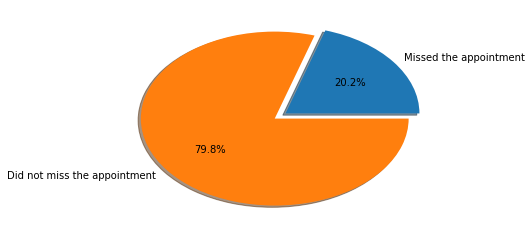

In [99]:
#Proportion distribution of the feature no_show

no_show = df.query('no_show == 1')['patient_id'].count()
showed_up = df.query('no_show == 0')['patient_id'].count()
plt.pie([no_show,showed_up], explode = explode, labels = ['Missed the appointment','Did not miss the appointment'], autopct = '%1.1f%%', shadow = True);


## Data Cleaning 

#### Data entries with values 1 to 4 in the column 'handicap' can be replaced with '1' 

In [100]:
df.handicap =  df.handicap.replace({2:1, 3:1, 4:1})

#verify 
df.handicap.max()

1

#### Check if there are any discrepancies in patient's details 



In [101]:
#Prints number of discrepancies in the features corresponding to patient_ids

def check_discrepancy(feature, length_of_unique_patiend_id):
    temp_df = df[['patient_id', feature]]
    duplicates_temp_df = sum(temp_df.duplicated())
    print("There are " + str(110527 - (length_of_unique_patiend_id + duplicates_temp_df)) + " discrepancies in the feature '" + feature +"'")

In [102]:
length_of_unique_patient_id = df.patient_id.nunique()
check_discrepancy('scholarship', length_of_unique_patient_id)

print("\n")
check_discrepancy('hypertension', length_of_unique_patient_id)

print("\n")
check_discrepancy('diabetes', length_of_unique_patient_id)

print("\n")
check_discrepancy('alcoholism', length_of_unique_patient_id)

print("\n")
check_discrepancy('handicap', length_of_unique_patient_id)


There are 0 discrepancies in the feature 'scholarship'


There are 0 discrepancies in the feature 'hypertension'


There are 0 discrepancies in the feature 'diabetes'


There are 0 discrepancies in the feature 'alcoholism'


There are 0 discrepancies in the feature 'handicap'


#### Create a new column for difference between scheduled_day and appointment_day

In [103]:
#Returns date part from a datetime object

def extract_date(datetime_object):
    return datetime_object.date()


In [104]:
df['days_before_appointment'] = (df.appointment_day.apply(extract_date)
    - df.scheduled_day.apply(extract_date)
    )


df.days_before_appointment = df.days_before_appointment.astype('timedelta64[D]').astype(int)
df.days_before_appointment.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_before_appointment, dtype: float64

In [105]:
df.query('days_before_appointment < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appointment
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,1,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,1,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,1,-1


#### Observation: 

There are 5 data entries with negative number of days between schedule_day adnd appointment_day. This means an appointment was booked for a previous date. These are automatic no show entries. I am dropping these rows

In [106]:
df.days_before_appointment.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_before_appointment, dtype: float64

In [107]:
df.drop(df[df.days_before_appointment < 0].index , inplace= True)


# verify
df.query('days_before_appointment < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appointment


#### Group days_before_appointment 

In [108]:
bin_edges = [-1,0,4,15,179]

bin_names = ['same day appointments','0 to 4 days','4 to 15 days','15 to 179 days']

df['grouped_days_before_appointment'] = pd.cut(df['days_before_appointment'], bin_edges, labels=bin_names)

df.grouped_days_before_appointment.value_counts()

same day appointments    38563
15 to 179 days           26246
4 to 15 days             25748
0 to 4 days              19965
Name: grouped_days_before_appointment, dtype: int64

In [109]:
df.grouped_days_before_appointment.describe()

count                    110522
unique                        4
top       same day appointments
freq                      38563
Name: grouped_days_before_appointment, dtype: object

In [110]:
#Create age groups 

# Group 0 for age 0 to 10 
# group 1 for age 11 to 20 and so on 
# Age 115 will be group 11
df ['age_group'] = df.age.apply(lambda x: min(int(x/10),10))


In [111]:
age_group_counts = df.age_group.value_counts().sort_index()
age_group_counts

0     17475
1     12935
2     13698
3     15170
4     14209
5     15863
6     11876
7      5934
8      2945
9       406
10       11
Name: age_group, dtype: int64

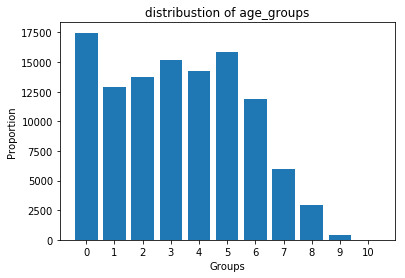

In [113]:
# Age_count distributions


objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
y_pos = np.arange(len(objects))
y_values = age_group_counts


plt.bar(y_pos, y_values)
plt.xticks(y_pos, objects)
plt.ylabel('Proportion')
plt.xlabel('Groups')
plt.title('distribustion of age_groups');
 

#### Data Wrangling and Data cleaning summary 

1. Changed the datatype of scheduled_day and appointment_day from string to datetime 
2. Added new columns days_before_appointmentment, age_groups 
3. Verified if there any discrepancies in poatient attributes 
4. Values 2,3,4 in handicap feature was replaced with 1 
5. Analyzed and visualized each feature for better understanding of proportions and distributions
6. Renamed column names for consistency  

<a id='eda'></a>

## Exploratory Data Analysis


In this section I will be focusing on exploring and answering the questions. I will also be focusing on understanding if there are any correlations between different features. 

### Research question 1: Are specific age groups more consistent in attending their appointments and Which age group among females has the least no_show rate?
                            

- Dependent variable: no_show
- Independent variables: gender, age_group 

In [114]:
didnt_show_up = df.no_show == 1
showed_up = df.no_show == 0

In [115]:
no_show_df = df.query('no_show == 1')['age_group']
no_show_df = no_show_df.value_counts().sort_index()


#Total number of people who missed the appointment
total_no_show = df.query('no_show == 1')['patient_id'].count()

In [116]:
print(total_no_show)

22314


In [117]:
# Patients who did not show up to their appointments, categorized by their age group

no_show_proprtion_by_age_group = no_show_df/age_group_counts
no_show_proprtion_by_age_group

0     0.199313
1     0.251720
2     0.246678
3     0.217469
4     0.202688
5     0.174998
6     0.150724
7     0.152005
8     0.157555
9     0.201970
10    0.272727
Name: age_group, dtype: float64

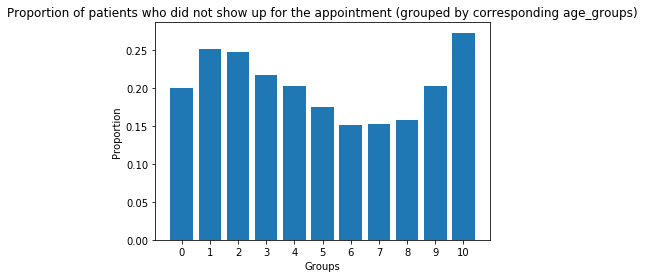

In [118]:
objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
y_pos = np.arange(len(objects))
y_values = no_show_proprtion_by_age_group


plt.bar(y_pos, y_values)
plt.xticks(y_pos, objects)
plt.ylabel('Proportion')
plt.xlabel('Groups')
plt.title('Proportion of patients who did not show up for the appointment (grouped by corresponding age_groups)');

### no_show_rate grouped by age_group and gender 

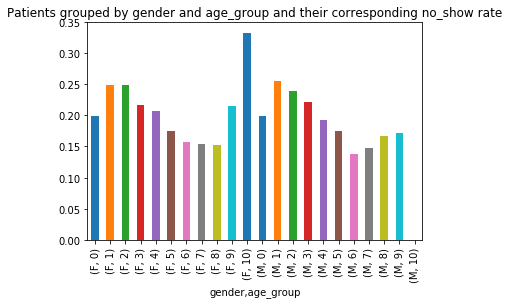

In [134]:
df.groupby(['gender','age_group']).no_show.mean().plot(kind = 'bar', title = 'Patients grouped by gender and age_group and their corresponding no_show rate');

#### Observation: 

- Patients from age groups 6, 7 and 8 are less likely to miss an appointment, whereas, patients from age group 1, 2 and 10 are more likely to miss an appointment. Although, in certain age groups (like age group 10), there are very few number of patients to make such a generalized conclusion. 

- Among females in specific, age_group 8 ( age 81 to 90) exhibits the least no_show rate


### Research Question 2:  Are patients who are notified via SMS less likely to miss their appointments? Is there a correlation between days_before_appointment and sms_received? And what is their correlation with no_show?

- Dependent variable: no_show
- Independent variables: sms_recieved and days_before_appointment

In [49]:
#Prints data and plots about patients who received sms 

def sms_and_no_show(dataframe):
    received_sms_didnt_show_up = dataframe.query('sms_received == 1 and no_show == 1')['patient_id'].count()
    received_sms_showed_up = dataframe.query('sms_received == 1 and no_show == 0')['patient_id'].count()
    total_recieved_sms = dataframe.query('sms_received == 1')['patient_id'].count()
    received_sms_didnt_show_up_proportion = received_sms_didnt_show_up/total_recieved_sms
    print("Proportion of patients who received sms but did not make it to the appointment " + str(received_sms_didnt_show_up_proportion))

    received_sms_showed_up_proportion = received_sms_showed_up/ total_recieved_sms
    print("Proportion of patients who received sms and made it to the appointment " + str(received_sms_showed_up_proportion))

    print("\n")
    print("Total number of patients who received sms notification: " + str(total_recieved_sms))
    
    return received_sms_didnt_show_up_proportion, received_sms_showed_up_proportion 



Proportion of patients who received sms but did not make it to the appointment 0.275745448396
Proportion of patients who received sms and made it to the appointment 0.724254551604


Total number of patients who received sms notification: 35482


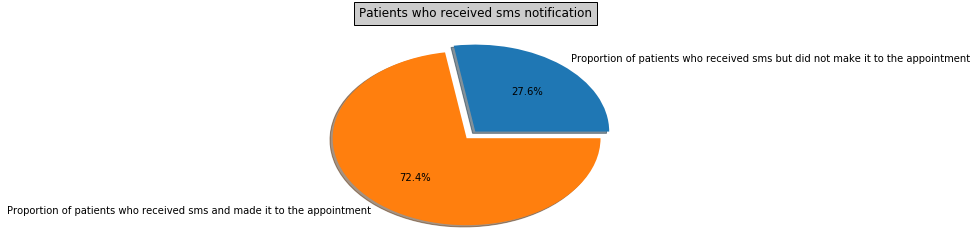

In [50]:
received_sms_didnt_show_up_proportion_1, received_sms_showed_up_proportion_1 = sms_and_no_show(df)


explode = (0, 0.1) 

plt.pie([received_sms_didnt_show_up_proportion_1, received_sms_showed_up_proportion_1],explode = explode, labels=['Proportion of patients who received sms but did not make it to the appointment', 'Proportion of patients who received sms and made it to the appointment'], autopct='%1.1f%%',
        shadow=True); 
plt.title('Patients who received sms notification', bbox={'facecolor':'0.8', 'pad':5});

##### Observation: 

Among the ones who received sms notifictaion,  72.4 percent made it to the appointment. Since we know that a lot of the patients did no receive sms_notfication at all, we can further fine tune our analysis  

### Correlation  between days_before_appointment and sms_recieved


In [51]:
# After how many days of scheduling the appointment was an sms sent 

df.query('sms_received == 1')['days_before_appointment'].min()

3

##### Observation: There were no sms sent out for days_before_appointment < 3

In [52]:
# Number of patients receiving sms with respect to their time between scheduled_day and appointment_day

df.groupby('days_before_appointment')['sms_received'].value_counts().head(20)


days_before_appointment  sms_received
0                        0               38563
1                        0                5213
2                        0                6725
3                        0                1831
                         1                 906
4                        1                3054
                         0                2236
5                        1                2054
                         0                1223
6                        1                2684
                         0                1353
7                        1                2850
                         0                2056
8                        1                1440
                         0                 892
9                        1                 997
                         0                 608
10                       1                 698
                         0                 693
11                       0                 505
Name: sms_received, dt

##### Observation:  We can see that a lot of patients only started receiving sms notification only after (days_before_appointment )>= 4

We can now answer our question 2 (correlation between sms_received and no_show) with only (days_after_appointment )>= 4

In [53]:
df_trimmed = df.query('days_before_appointment >=4')
df_trimmed.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appointment,age_group
count,5.728400e+04,5.728400e+04,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000,57284.000000
mean,1.462743e+14,5.643302e+06,37.471353,0.095768,0.194243,0.066738,0.024597,0.016287,0.603589,0.299612,19.180050,3.313211
std,2.546720e+14,7.634296e+04,22.800608,0.294276,0.395620,0.249569,0.154894,0.126579,0.489156,0.458092,16.740616,2.269403
min,5.376150e+05,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,3.994786e+12,5.604408e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
50%,3.123222e+13,5.648396e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000,3.000000
75%,9.415477e+13,5.696276e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,27.000000,5.000000
max,9.999320e+14,5.773061e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,10.000000


In [54]:
received_sms_didnt_show_up_proportion_2, received_sms_showed_up_proportion_2 = sms_and_no_show(df_trimmed)


Proportion of patients who received sms but did not make it to the appointment 0.277388940305
Proportion of patients who received sms and made it to the appointment 0.722611059695


Total number of patients who received sms notification: 34576


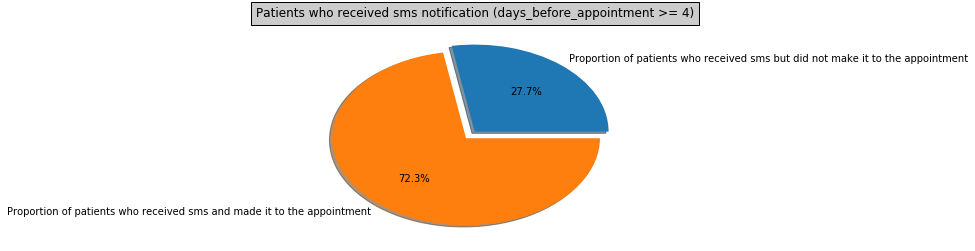

In [55]:
explode = (0, 0.1) 

plt.pie([received_sms_didnt_show_up_proportion_2, received_sms_showed_up_proportion_2],explode = explode, labels=['Proportion of patients who received sms but did not make it to the appointment', 'Proportion of patients who received sms and made it to the appointment'], autopct='%1.1f%%',
        shadow=True); 
plt.title('Patients who received sms notification (days_before_appointment >= 4)', bbox={'facecolor':'0.8', 'pad':5});

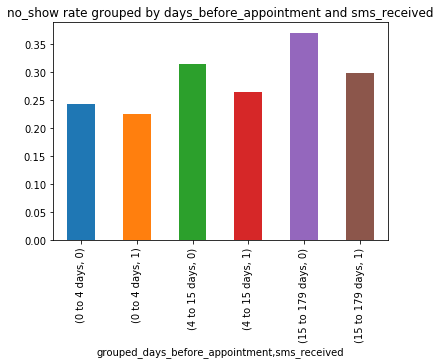

In [56]:
df_trimmed.groupby(['grouped_days_before_appointment','sms_received'])['no_show'].mean().plot(kind = 'bar' , title = 'no_show rate grouped by days_before_appointment and sms_received');

#### Observation :

- Here, we considered part of the data where the proportion of patients receiving sms notifications are higher. Among the patients who received sms notifications, 72.3 percent made it to the appointment. 

- As the number of days between scheduled_day and appointment_day increases, the no show_rate seems to be increasing 

- In general, no_show rate seems to be lower for patients who recieved sms in comparison to those who did not  

### Research question 3: Are patients with same day appointments  more likely to attend it. Which age_group has the most number of same_day_appointments? Which age_group has the highest no_show rate among them? 

- Dependent vaiable : no_show
- Independent variables : age_group, days_before_appointment

In [57]:
same_day_appointments_count = df.query('grouped_days_before_appointment == "same day appointments"')['patient_id'].count()
print(same_day_appointments_count)
print(same_day_appointments_count / df.shape[0])

38563
0.34891695771


In [58]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show', 'days_before_appointment', 'grouped_days_before_appointment',
       'age_group'],
      dtype='object')

In [59]:
# 38563 makes upto a 34.9 percent of our dataset 
df_same_day = df.query('grouped_days_before_appointment == "same day appointments"')
same_day_appointments_proprtion = df_same_day.groupby('no_show')['patient_id'].count() / same_day_appointments_count


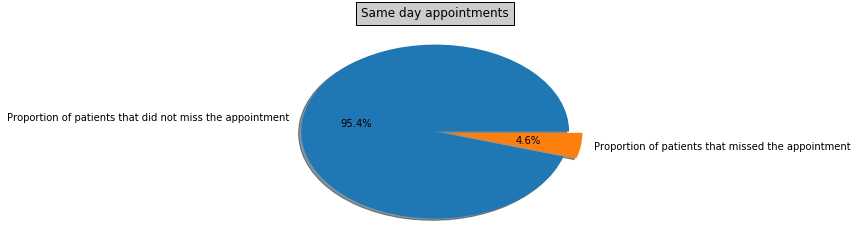

In [60]:
explode = (0, 0.1) 

plt.pie([same_day_appointments_proprtion[0], same_day_appointments_proprtion[1]],explode = explode, labels=['Proportion of patients that did not miss the appointment','Proportion of patients that missed the appointment'], autopct='%1.1f%%',
        shadow=True); 
plt.title('Same day appointments', bbox={'facecolor':'0.8', 'pad':5});

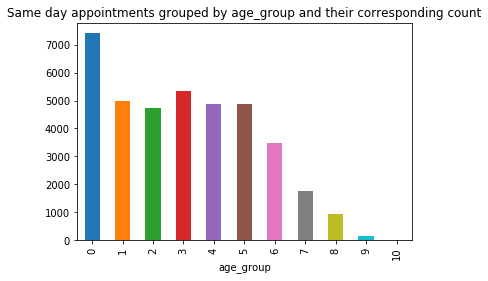

In [61]:
df_same_day.groupby('age_group')['patient_id'].count().plot(kind = 'bar', title = 'Same day appointments grouped by age_group and their corresponding count');

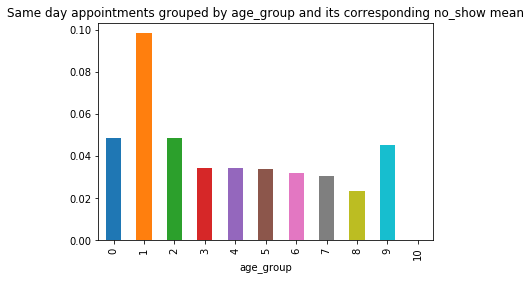

In [62]:
df_same_day.groupby('age_group')['no_show'].mean().plot(kind = 'bar', title = 'Same day appointments grouped by age_group and its corresponding no_show mean');

#### Observation: 
- Patients with same day appointments are highly likely to make it to the apointment 
- Age group 0 seems to be booking most number of same day appointments 
- Age group 1 has the highest no_show rate among same day appointments

### No show rates of patients' attributes

In [63]:
# Plots no-show rates in the form of bar charts of feature passed in 

def bar_plot_no_show_rate(feature, no_show_appointments = 'no_show == 1'):


    value_counts = df[feature].value_counts().sort_index()
    no_show_count = df.query(no_show_appointments)[feature].value_counts().sort_index()
    no_show_proportion = no_show_count/value_counts
    print(no_show_proportion)
    plt.xlabel( 'no_show proportion')
    plt.ylabel(feature)
    plt.title( feature + " no_show_rate")
    plt.yticks(np.arange(len(value_counts)))
    plt.barh(value_counts.index, no_show_proportion)

same day appointments    0.046469
0 to 4 days              0.229902
4 to 15 days             0.285381
15 to 179 days           0.327059
Name: grouped_days_before_appointment, dtype: float64


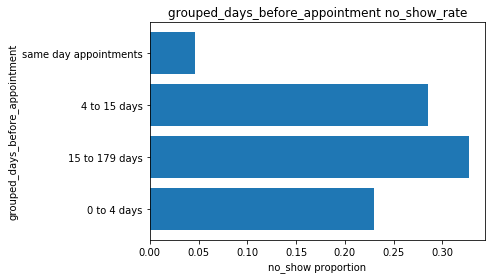

In [64]:
bar_plot_no_show_rate(feature= 'grouped_days_before_appointment')

0    0.198031
1    0.237363
Name: scholarship, dtype: float64


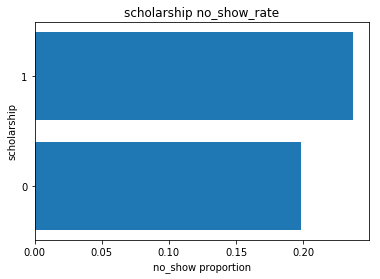

In [65]:
bar_plot_no_show_rate(feature= 'scholarship')

0    0.201909
1    0.201488
Name: alcoholism, dtype: float64


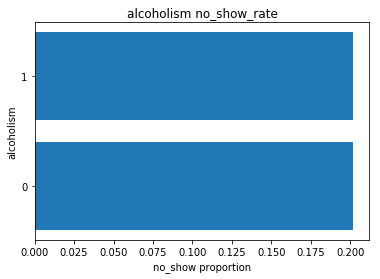

In [66]:
bar_plot_no_show_rate(feature= 'alcoholism')

0    0.202331
1    0.180884
Name: handicap, dtype: float64


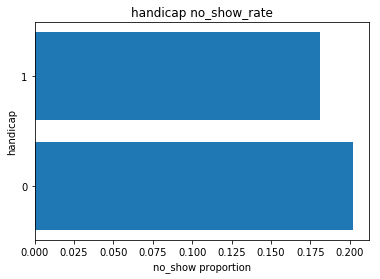

In [67]:
bar_plot_no_show_rate(feature = 'handicap')

F    0.203113
M    0.199638
Name: gender, dtype: float64


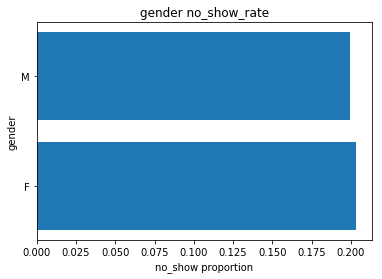

In [68]:
bar_plot_no_show_rate(feature= 'gender')

0    0.203589
1    0.180033
Name: diabetes, dtype: float64


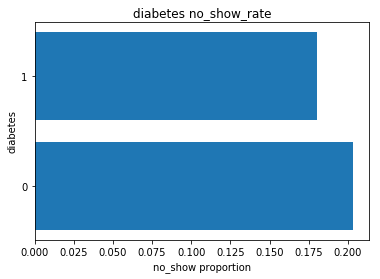

In [69]:
bar_plot_no_show_rate(feature= 'diabetes')

0    0.208992
1    0.173020
Name: hypertension, dtype: float64


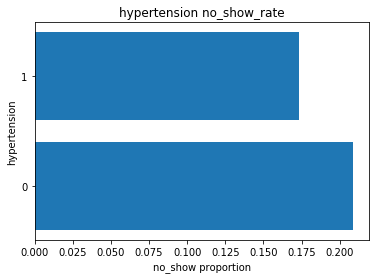

In [70]:
bar_plot_no_show_rate(feature= 'hypertension')

#### The above graphs summarize no_show rates of patients by their atrributes. Since a small proportion of patients have attributes like diabetes and hypertension , I decided not to infer any correlations from them


<a id='conclusions'></a>
## Conclusions


- We have looked into relationships between age (age_group) and no_show. There are some age_groups that are more consistent in comparison to others. Since there are only a few observations in certain age_group, it is difficult to conclude if age has a strong correlation with no_show

- We also grouped patients by age_group and gender and observed the ones with least no_show rate 

- I explored the relationship between sms_recieved and no_show. It is important to note that not all the patients received sms notifications. Among the ones who did receive them, significant proportion of the patients made it to the appointment. 

- We also noticed a correlation between days_before_appointment and sms_recieved ( like same day appointments did not recieve sms) 

- Patients who recieved sms notification, seem to have a lower no_show rate in comparison to those who did not receive sms in the same days_beofre_appointment group 

- Among the patients with same day appointments, the no_show rate is extremely low 

- Among same day appointments, patients from age_group 0 seem to have booked most of the appointments and patients from age_group 1 seem to have the highest no_show rate 

- I also visualized no show rates for patients attributes like diabted, alcoholism and hypertension 

**Limitations**

It is important to note that, the data we have in this dataset is limited to appointments spanned over a few months. A larger dataset would help in a better analysis. The findings of this analysis cannot be used for predicting the very factors that contribute directly to no_show. The correlations between different features could have been explored to a further extent. 

